**Dataset Description**
In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

**File and Data Field Descriptions**
train.csv - Personal records for about two-thirds (8700) of the passengers, to be used as training data.
PassengerId - A unique Id for each passenger. Each Id takes the form where indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
Destination - The planet the passenger will be debarking to.
Age - The age of the passenger.
VIP - Whether the passenger has paid for special VIP service during the voyage.
RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
Name - The first and last names of the passenger.
Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
test.csv - Personal records for the remaining one-third (4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
sample_submission.csv - A submission file in the correct format.
PassengerId - Id for each passenger in the test set.
Transported - The target. For each passenger, predict either True or False.

**Importation des librairies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import f1_score

**Lecture et Exploration du dataset **




In [2]:
#Dataset 
df=pd.read_csv("train.csv")
df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
#Affichage des informations du dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [4]:
#Aperçu statistique des données numériques 
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


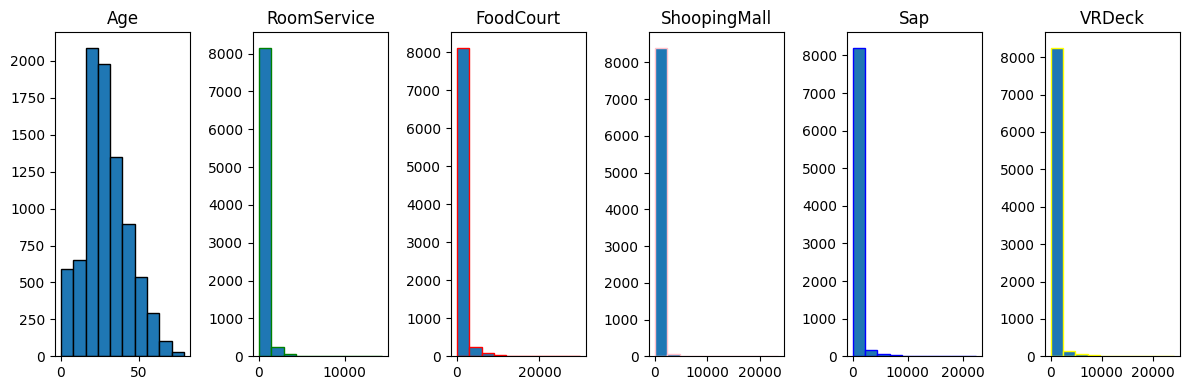

In [5]:
#Visualisation de la distribution des données numériques 
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(12, 4))

axes[0].hist(df['Age'], bins=10, edgecolor='black')
axes[0].set_title('Age')
axes[1].hist(df['RoomService'], bins=10, edgecolor='green')
axes[1].set_title('RoomService')
axes[2].hist(df['FoodCourt'], bins=10, edgecolor='red')
axes[2].set_title('FoodCourt')
axes[3].hist(df['ShoppingMall'], bins=10, edgecolor='pink')
axes[3].set_title('ShoopingMall')
axes[4].hist(df['Spa'], bins=10, edgecolor='blue')
axes[4].set_title('Sap')
axes[5].hist(df['VRDeck'], bins=10, edgecolor='yellow')
axes[5].set_title('VRDeck')
#Ajustement des encadrements 
plt.tight_layout()
# Affichage des graphiques
plt.show()

In [6]:
#Aperçu des valeurs manquantes 
df.isna().sum()
print(df.isna().mean() * 100)

PassengerId     0.000000
HomePlanet      2.312205
CryoSleep       2.496261
Cabin           2.289198
Destination     2.093639
Age             2.059128
VIP             2.335212
RoomService     2.082135
FoodCourt       2.105142
ShoppingMall    2.392730
Spa             2.105142
VRDeck          2.162660
Name            2.300702
Transported     0.000000
dtype: float64


In [7]:
#Aperçu des doublons 
df.duplicated().sum()

0

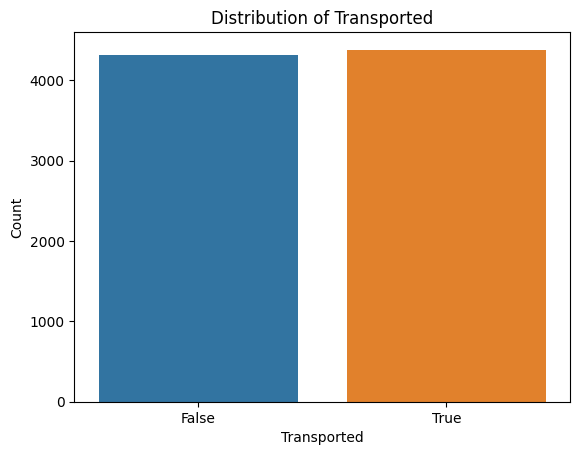

In [8]:
#variable cible = colonne 'transported' : représentation graphique des occurences de la colonne 
transported=df['Transported'].value_counts()
sns.barplot(x=transported.index, y=transported.values)
plt.xlabel('Transported')
plt.ylabel('Count')
plt.title('Distribution of Transported')
plt.show()

**Préparation du dataset **

In [9]:
#Certaines variables("Name", "Cabin"et "PassengerId") ne sont pas exploitables en l'état. Décision de les supprimer :df.drop(['Name', 'Cabin', "PassengerId"])
df=df.drop(['Name', 'Cabin', "PassengerId"], axis=1)

In [10]:
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


In [11]:
#séparation des données :  variable cible et variables explicatives 
target=df.Transported 
X=df.drop(["Transported"], axis=1)
X_train, X_test, y_train, y_test=train_test_split(X, target, test_size=0.2, random_state=42)

In [12]:
#gestion des valeurs manquantes 
#dans un premier temps séparation des variables catégorielles, des variables numériques : 
cat_col=["HomePlanet",'CryoSleep', 'Destination', 'VIP']
num_col=['Age','RoomService', 'FoodCourt',"ShoppingMall", "Spa", "VRDeck"]
cat_train, cat_test=X_train[cat_col],X_test[cat_col]
num_train, num_test=X_train[num_col], X_test[num_col]

In [13]:
#Choix d'utiliser Simple Impute pour remplacer les valeurs manquantes par la médiane pour les données numériques 
#et par la valeurs la plus fréquentes pour les données catégorielles.
cat_SI=SimpleImputer(strategy='most_frequent')
num_SI=SimpleImputer(strategy='median')

cat_train=cat_SI.fit_transform(cat_train)
cat_test=cat_SI.transform(cat_test)

num_train=num_SI.fit_transform(num_train)
num_test=num_SI.transform(num_test)

In [14]:
#Encodage des variables catégorielles 
#choix d'utiliser un OneHotEncoder 
ohe=OneHotEncoder(drop='first', sparse= False)
cat_train=ohe.fit_transform(cat_train)
cat_test=ohe.transform(cat_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [15]:
#reconstitution du dataset 
X_train=np.concatenate([num_train, cat_train], axis=1)
X_test=np.concatenate([num_test, cat_test], axis=1)

In [16]:
#Verification des shape : 
print('Dimension du jeu Entrainement et du jeu Test :', X_train.shape, X_test.shape)

Dimension du jeu Entrainement et du jeu Test : (6954, 12) (1739, 12)


MODELISATION
* DecisionTreeClassifier
*   SVM (Séparateur à vaste marge "Antoine Cornejuols : Apprentissage Artificiel)
*   SimpleNet model 





In [17]:
#standardisation des données : 
scaler=StandardScaler()
num_train_sc=scaler.fit_transform(num_train)
num_test_sc=scaler.transform(num_test)

In [18]:
#Reconstitution : 
X_train_sc=np.concatenate([num_train_sc, cat_train], axis=1)
X_test_sc=np.concatenate([num_test_sc, cat_test], axis=1)

In [19]:
#DecisionTreeClassifier 
dtc=DecisionTreeClassifier(random_state=42)
dtc.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
#svm 
svm=SVC(gamma="scale")
svm.fit(X_train_sc, y_train)

SVC()

In [21]:
#SimpleNet
#conversion des données en tensor pytorch :
X_train_tensor=torch.tensor(X_train_sc).float()
X_test_tensor=torch.tensor(X_test_sc).float()
y_train_tensor=torch.tensor(y_train.to_numpy()).long()
y_test_tensor = torch.tensor(y_test.to_numpy()).long()

# Définition du modèle
class SimpleNet(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, 2)  # 2 classes : Oui ou Non

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out
# Entraînement du modèle
num_epochs = 10
batch_size = 16
learning_rate = 0.001

input_size = X_train_tensor.shape[1]  # Taille des caractéristiques d'entrée
hidden_size = 64  # Nombre de neurones dans la couche cachée

model = SimpleNet(input_size, hidden_size)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    total_loss = 0
    for i in range(0, len(X_train_tensor), batch_size):
        inputs = X_train_tensor[i:i+batch_size]
        labels = y_train_tensor[i:i+batch_size]

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}: Average Loss: {total_loss/len(X_train_tensor)}")
#on observe bien une perte moyenne qui diminue progressivement, notre modèle apprend a ajuster ses paramètres.

Epoch 1: Average Loss: 0.030777273385182585
Epoch 2: Average Loss: 0.027456202292222898
Epoch 3: Average Loss: 0.02720670008842788
Epoch 4: Average Loss: 0.027045000079876737
Epoch 5: Average Loss: 0.02692503863953639
Epoch 6: Average Loss: 0.0268335704800724
Epoch 7: Average Loss: 0.026755058293134137
Epoch 8: Average Loss: 0.02669163649220867
Epoch 9: Average Loss: 0.026639790587857908
Epoch 10: Average Loss: 0.026592843335251512


Evaluation des performances des modèles

In [22]:
#DecisionTreeClassifier 
y_pred=dtc.predict(X_test)
print("\nScore DecisionTree:", f1_score(y_test, y_pred))
pd.crosstab(y_test, y_pred, rownames=['Classe Réelle'], colnames=['Classe Prédite'])


Score DecisionTree: 0.7489130434782609


Classe Prédite,False,True
Classe Réelle,,
False,588,273
True,189,689


In [23]:
#svm
y_pred_svm=svm.predict(X_test_sc)
print("\nScore SVM:", f1_score(y_test, y_pred_svm))
pd.crosstab(y_test, y_pred_svm, rownames=['Classe Réelle'], colnames=['Classe Prédite'])


Score SVM: 0.7918502202643172


Classe Prédite,False,True
Classe Réelle,,
False,642,219
True,159,719


In [24]:
#simplenet 
model.eval()  # Mettre le modèle en mode évaluation
with torch.no_grad():
    predicted_labels = model(X_test_tensor)
predicted_labels = torch.argmax(predicted_labels, dim=1)
f1 = f1_score(y_test_tensor.numpy(), predicted_labels.numpy())
print("F1-score: ", f1)

F1-score:  0.7982786444324906


Le model simplenet (Deep Learning) donne une meilleure performance 

Soumission du jeu test 

In [25]:
#Préparation du dataset test (en passant par la suppression des colonnes qui semblent non essentielles, remplacement des valeurs manquantes 
# encodage, standardisation, mise en place du model evaluation et prédiction )
df_T=pd.read_csv("test.csv")
df_T=df_T.drop(['Name', 'Cabin', "PassengerId"], axis=1)
cat_col=["HomePlanet",'CryoSleep', 'Destination', 'VIP']
num_col=['Age','RoomService', 'FoodCourt',"ShoppingMall", "Spa", "VRDeck"]
cat, num=df_T[cat_col], df_T[num_col]

cat_SI.fit(cat)
num_SI.fit(num)
cat=cat_SI.transform(cat)
num=num_SI.transform(num)

cat = ohe.transform(cat)
df_T= np.concatenate([num, cat], axis=1)

scaler=StandardScaler()
num=scaler.fit_transform(num)


df_T= np.concatenate([num, cat], axis=1)
X_test_tensor = torch.tensor(df_T).float()
# Mettre le modèle en mode évaluation
model.eval()

# Faire des prédictions sur les données de test
with torch.no_grad():
    predicted_labels = model(X_test_tensor)

# Convertir les prédictions en étiquettes prédites
predicted_labels = torch.argmax(predicted_labels, dim=1)

In [26]:
predicted_labels

tensor([1, 0, 1,  ..., 1, 1, 1])

In [39]:
#predicted_labels = predicted_labels.numpy()
predicted_labels.shape

(4277,)

In [28]:
#dataset des vraies valeurs 
dfs=pd.read_csv("sample_submission.csv")
dfs

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False
...,...,...
4272,9266_02,False
4273,9269_01,False
4274,9271_01,False
4275,9273_01,False


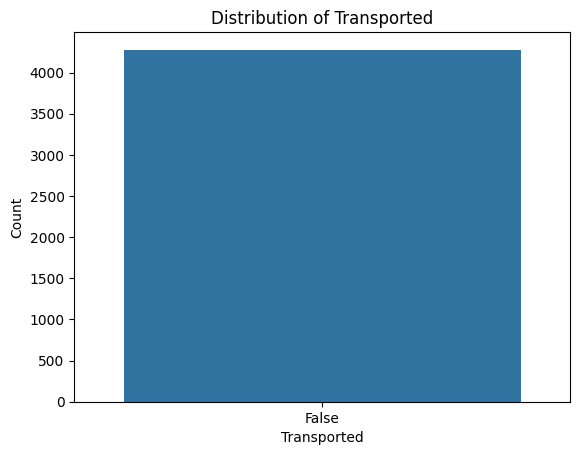

In [40]:
#Distribution des données 
real=dfs['Transported'].value_counts()
sns.barplot(x=real.index, y=real.values)
plt.xlabel('Transported')
plt.ylabel('Count')
plt.title('Distribution of Transported')
plt.show()
#on remarque que le dataset ne contient qu'une seule valeur : False , difficile d'appliquer le f1 score sur des données toutes nulles. 

Avec un autre dataset de soumission : voici la démarche pour évaluer le model : 

In [ ]:
true_labels = pd.read_csv("sample_submission.csv")["Transported"].map({True: 1, False: 0})
f1 = f1_score(true_labels, predicted_labels)
print("F1 Score:", f1)